In [1]:
library("dplyr")
library("ggplot2")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [88]:
setwd("~/piRNA/Workspaces/julia/PrimaryData/ref_data/human")

In [89]:
#chromosome data
chromosome_data<- read.table("summary_chroms.tsv", header=TRUE, sep="\t")

In [90]:
setwd("~/piRNA/Workspaces/julia/lnc")
data_precursors<- read.table("h38.bed", header=FALSE)
head(data_precursors)

V1,V2,V3,V4,V5,V6
chr1,24251429,24335724,Pachytene,1-p36-1107,84295
chr1,179585426,179591786,Pachytene,1-q25-2976,6360
chr1,222471907,222489700,Prepachytene,1-q41-289,17793
chr10,28789400,28795995,Pachytene,10-p11-10777,6595
chr10,44997697,45000888,Pachytene,10-q11-242,3191
chr10,77763999,77783913,Pachytene,10-q22-16903,19914


In [110]:
x="Bonobo"

In [108]:
setwd("~/piRNA/Workspaces/julia/piRNA_reads/mapping_human/unique/Bonobo")

In [109]:
unique_coverage<- read.table("Bonobo_map.bed", header = FALSE)

In [111]:
head(unique_coverage)

V1,V2,V3
NC_000010.11,47513,1
NC_000010.11,47514,1
NC_000010.11,47515,1
NC_000010.11,47516,1
NC_000010.11,47517,1
NC_000010.11,47518,1


In [112]:
names(unique_coverage)[names(unique_coverage) == "V1"]<- "REFSEQ_CHROM"
unique_data<- merge(unique_coverage, chromosome_data, by= "REFSEQ_CHROM")
names(unique_data)[names(unique_data) == "V2"]<- "position"
names(unique_data)[names(unique_data) == "V3"]<- "coverage"
unique_data_new<- unique_data[,-c(1,5,6)]
unique_data_new$UNIQUE_MULTI <- "Unique"

In [113]:
head(unique_data_new)

position,coverage,CHROM,UNIQUE_MULTI
137969,3,1,Unique
137970,3,1,Unique
137971,3,1,Unique
137972,3,1,Unique
137973,3,1,Unique
137974,3,1,Unique


In [114]:
setwd("~/piRNA/Workspaces/julia/piRNA_reads/mapping_human/multi/Bonobo")

In [115]:
multi_coverage<- read.table("Bonobo_map.bed", header = FALSE)

In [116]:
names(multi_coverage)[names(multi_coverage) == "V1"]<- "REFSEQ_CHROM"
multi_data<- merge(multi_coverage, chromosome_data, by= "REFSEQ_CHROM")
names(multi_data)[names(multi_data) == "V2"]<- "position"
names(multi_data)[names(multi_data) == "V3"]<- "coverage"
multi_data_new<- multi_data[,-c(1,5,6)]
multi_data_new$UNIQUE_MULTI <- "Multi"

In [117]:
head(multi_data_new)

position,coverage,CHROM,UNIQUE_MULTI
12298,1,1,Multi
12299,1,1,Multi
12300,1,1,Multi
12301,1,1,Multi
12302,1,1,Multi
12303,1,1,Multi


In [118]:
both<- rbind(unique_data_new, multi_data_new)

In [119]:
chrom1_both<- both %>% filter(CHROM == "19")
chrom1_pre<- data_precursors %>% filter(V1 == "chr19")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [120]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr19,16033653,16041254,Pachytene,19-p13-25455,7601,NA,NA,NA,NA
1,chr19,16015633,16027460,Pachytene,19-p13-4412,11827,NA,NA,NA,NA
1,chr19,19741552,19754992,Pachytene,19-p13-6652,13440,NA,NA,NA,NA
1,chr19,34810543,34832869,Pachytene,19-q13-13274,22326,NA,NA,NA,NA
1,chr19,34833109,34855304,Pachytene,19-q13-2441,22195,NA,NA,NA,NA
1,chr19,34886469,34905171,Pachytene,19-q13-4180,18702,NA,NA,NA,NA


In [121]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 8 rows containing missing values (`geom_line()`).”Warning message:
“Removed 796821 rows containing missing values (`geom_point()`).”

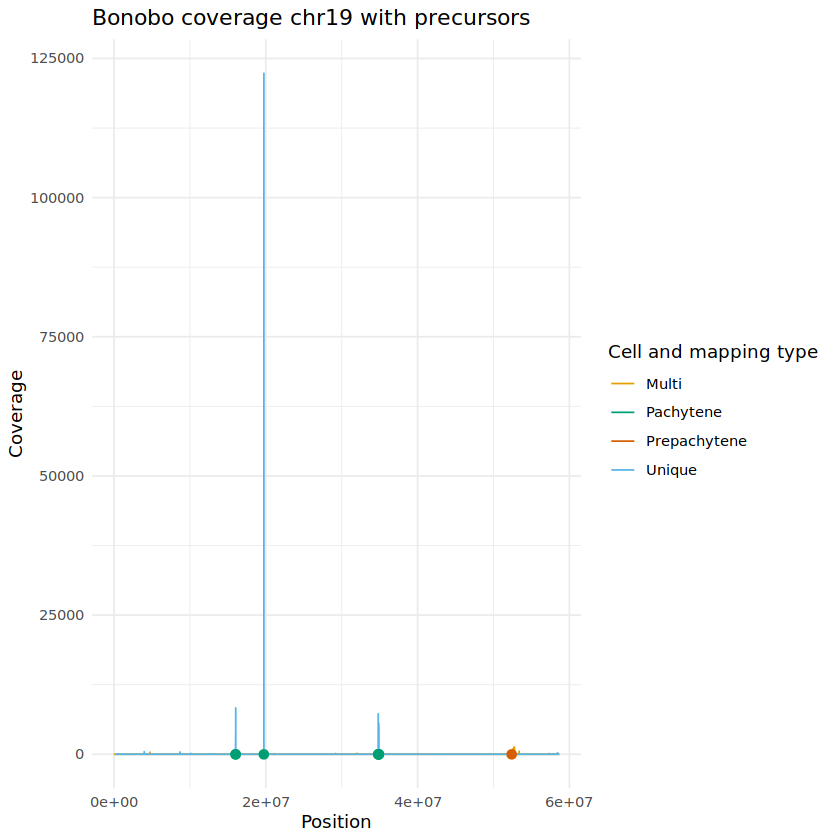

In [122]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-20, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr19 with precursors"))+
    labs(x="Position", y="Coverage")

In [20]:
chrom1_both<- both %>% filter(CHROM == "2")
chrom1_pre<- data_precursors %>% filter(V1 == "chr2")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [21]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr2,110678284,110716605,Pachytene,2-q13-9453,38321,NA,NA,NA,NA
1,chr2,131402900,131408194,Pachytene,2-q21-678,5294,NA,NA,NA,NA
1,chr2,238225112,238231651,Pachytene,2-q37-1034,6539,NA,NA,NA,NA
1,chr2,203328238,203432172,Prepachytene,pi-ABI2,103934,NA,NA,NA,NA
1,chr2,94755423,94857282,Prepachytene,pi-ANKRD20A8P,101859,NA,NA,NA,NA
1,chr2,97504797,97589965,Pachytene,pi-ANKRD36B,85168,NA,NA,NA,NA


In [22]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 10 rows containing missing values (`geom_line()`).”Warning message:
“Removed 13925062 rows containing missing values (`geom_point()`).”

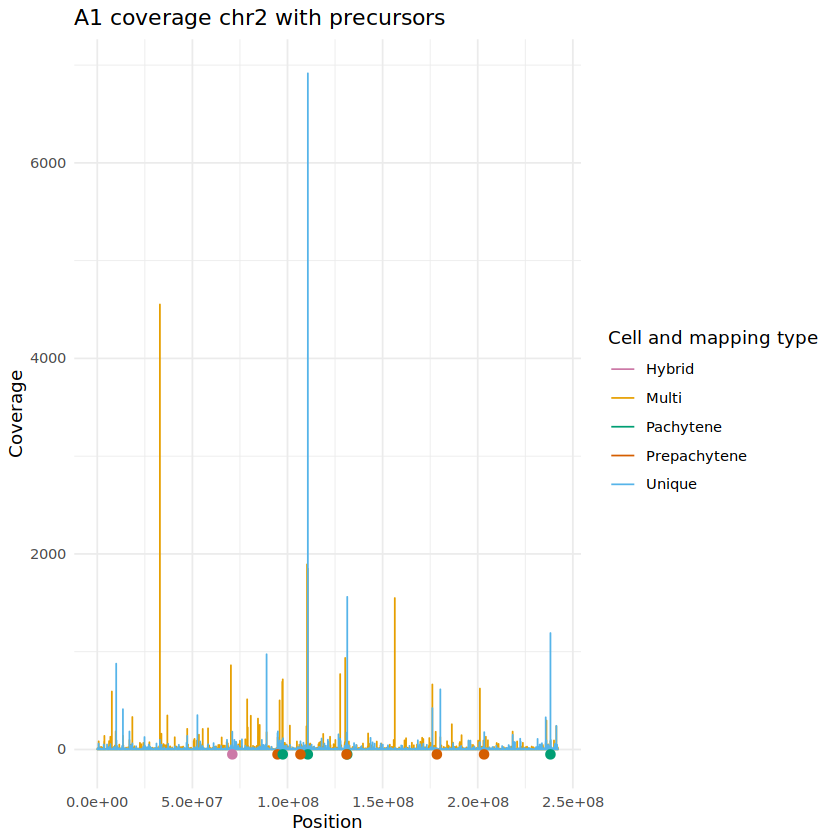

In [23]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-50, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr2 with precursors"))+
labs(x="Position", y="Coverage")

In [24]:
chrom1_both<- both %>% filter(CHROM == "3")
chrom1_pre<- data_precursors %>% filter(V1 == "chr3")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [25]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr3,12849103,12876169,Pachytene,3-p25-2999,27066,NA,NA,NA,NA
1,chr3,128825118,128845989,Pachytene,3-q22-367,20871,NA,NA,NA,NA
1,chr3,181952342,182010678,Pachytene,3-q26-1568,58336,NA,NA,NA,NA
1,chr3,198057530,198080671,Pachytene,3-q29-236,23141,NA,NA,NA,NA
1,chr3,12897248,13073485,Prepachytene,pi-IQSEC1,176237,NA,NA,NA,NA
1,chr3,15042250,15065260,Prepachytene,pi-MRPS25,23010,NA,NA,NA,NA


In [26]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 11 rows containing missing values (`geom_line()`).”Warning message:
“Removed 10908640 rows containing missing values (`geom_point()`).”

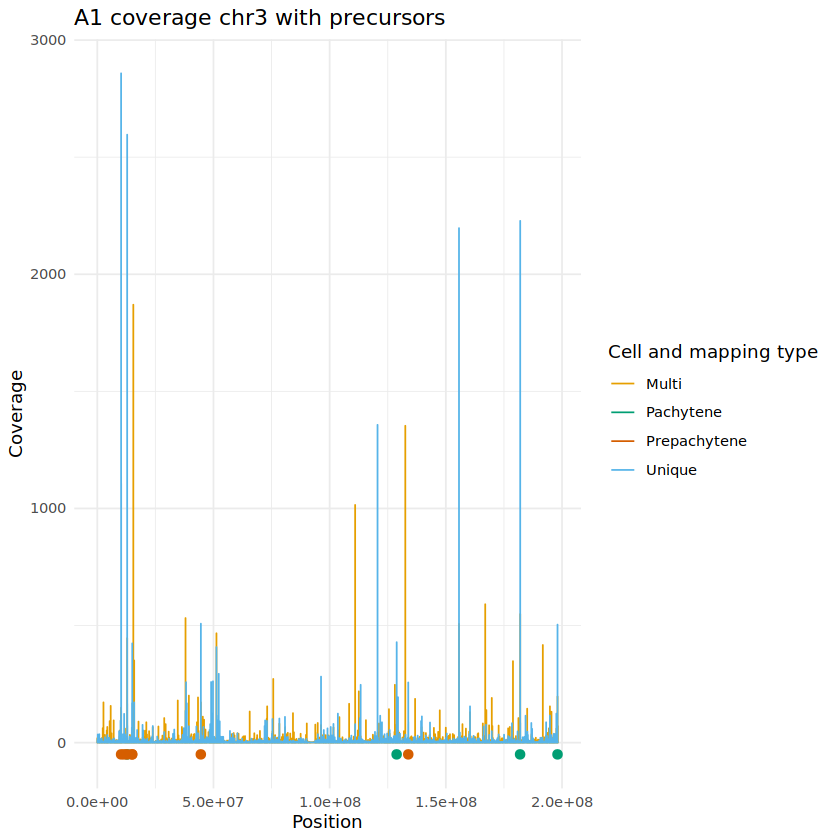

In [27]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-50, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr3 with precursors"))+
labs(x="Position", y="Coverage")

In [28]:
chrom1_both<- both %>% filter(CHROM == "4")
chrom1_pre<- data_precursors %>% filter(V1 == "chr4")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [29]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr4,10117121,10189941,Pachytene,4-p16-5577,72820,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,18763,1,4,Unique
2,NA,NA,NA,NA,NA,NA,18764,1,4,Unique
2,NA,NA,NA,NA,NA,NA,18765,1,4,Unique
2,NA,NA,NA,NA,NA,NA,18766,1,4,Unique
2,NA,NA,NA,NA,NA,NA,18767,1,4,Unique


In [30]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”Warning message:
“Removed 9159026 rows containing missing values (`geom_point()`).”

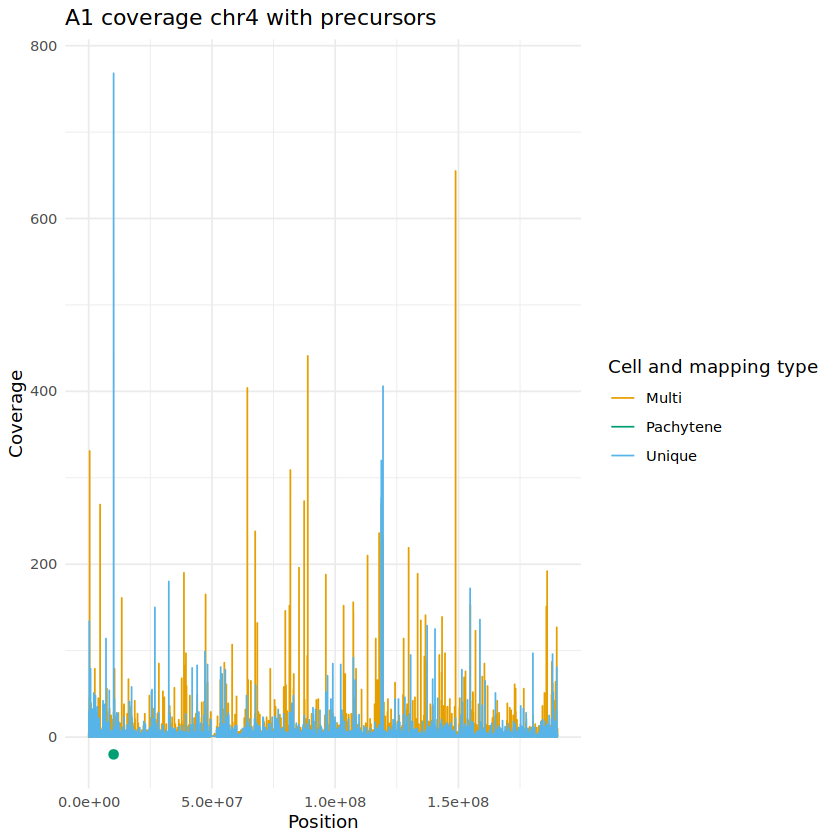

In [31]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-20, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr4 with precursors"))+
labs(x="Position", y="Coverage")

In [32]:
chrom1_both<- both %>% filter(CHROM == "5")
chrom1_pre<- data_precursors %>% filter(V1 == "chr5")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [33]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr5,180681198,180684596,Pachytene,5-q35-131,3398,NA,NA,NA,NA
1,chr5,180684765,180688787,Pachytene,5-q35-1815,4022,NA,NA,NA,NA
1,chr5,176143084,176185155,Pachytene,5-q35-600,42071,NA,NA,NA,NA
1,chr5,14704803,14871778,Prepachytene,pi-ANKH,166975,NA,NA,NA,NA
1,chr5,113022098,113488830,Prepachytene,pi-MCC,466732,NA,NA,NA,NA
1,chr5,134148934,134176964,Prepachytene,pi-SKP1,28030,NA,NA,NA,NA


In [34]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”Warning message:
“Removed 9755724 rows containing missing values (`geom_point()`).”

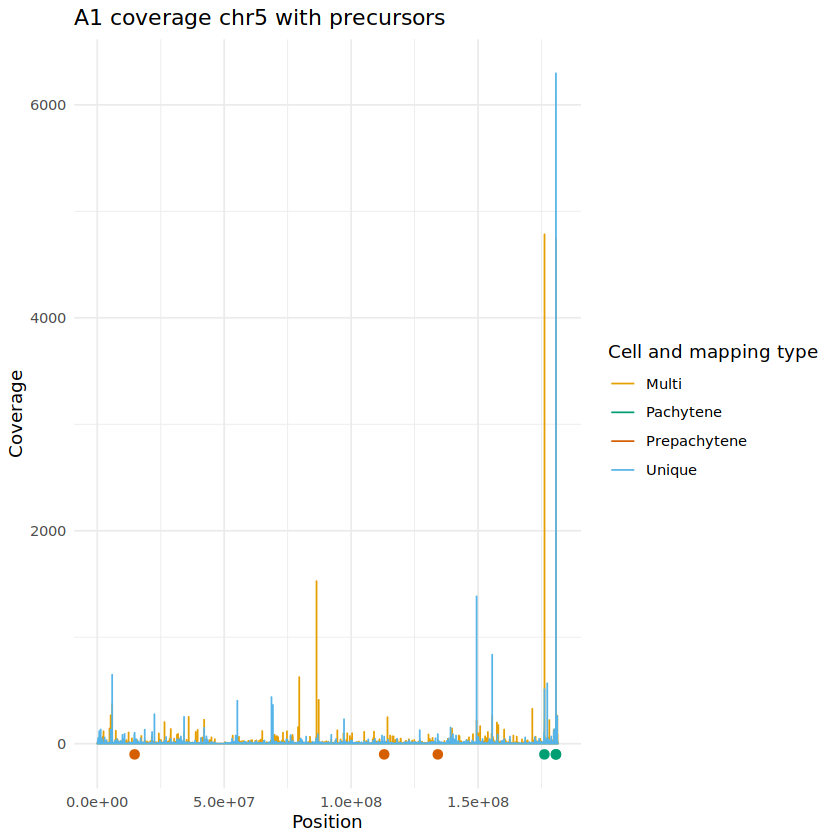

In [35]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-100, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr5 with precursors"))+
labs(x="Position", y="Coverage")

In [36]:
chrom1_both<- both %>% filter(CHROM == "6")
chrom1_pre<- data_precursors %>% filter(V1 == "chr6")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [37]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr6,33867505,33892451,Pachytene,6-p21-16923,24946,NA,NA,NA,NA
1,chr6,33893163,33918208,Pachytene,6-p21-43244,25045,NA,NA,NA,NA
1,chr6,39115071,39152902,Pachytene,6-p21-438,37831,NA,NA,NA,NA
1,chr6,29529419,29533568,Pachytene,6-p22-5808,4149,NA,NA,NA,NA
1,chr6,11044679,11079113,Pachytene,6-p24-803,34434,NA,NA,NA,NA
1,chr6,34889264,35091413,Prepachytene,pi-ANKS1A,202149,NA,NA,NA,NA


In [38]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 14 rows containing missing values (`geom_line()`).”Warning message:
“Removed 9034808 rows containing missing values (`geom_point()`).”

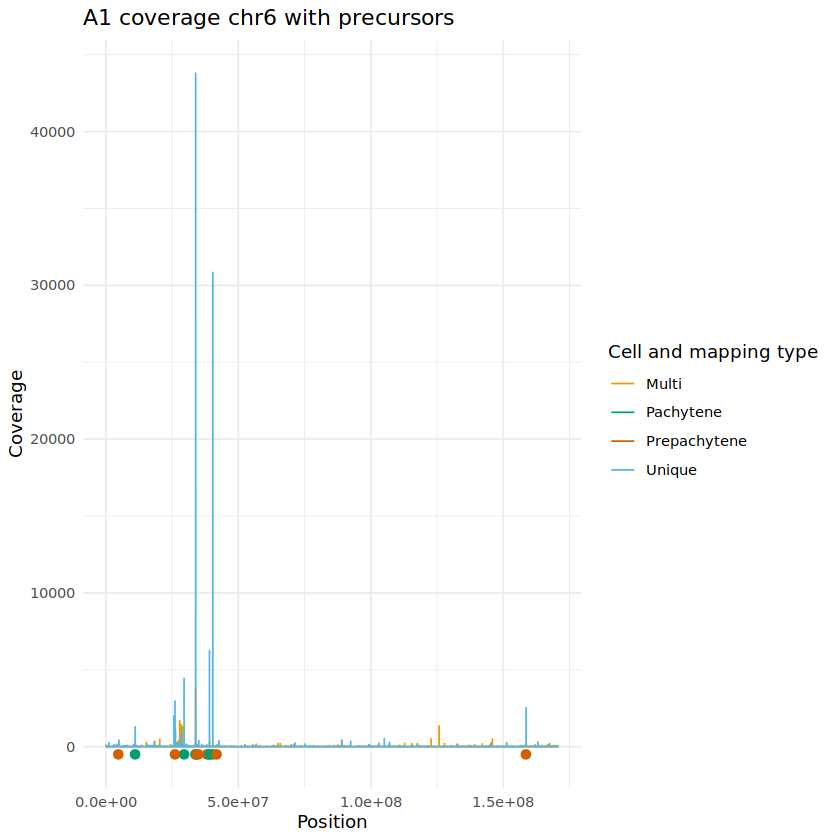

In [39]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-500, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr6 with precursors"))+
labs(x="Position", y="Coverage")

In [40]:
chrom1_both<- both %>% filter(CHROM == "7")
chrom1_pre<- data_precursors %>% filter(V1 == "chr7")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [41]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr7,56809213,56851970,Prepachytene,7-p11-1545,42757,NA,NA,NA,NA
1,chr7,56483439,56497285,Pachytene,7-p11-9381,13846,NA,NA,NA,NA
1,chr7,118208942,118224642,Pachytene,7-q31-418,15700,NA,NA,NA,NA
1,chr7,43608494,43729505,Prepachytene,pi-COA1,121011,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,31440,1,7,Unique
2,NA,NA,NA,NA,NA,NA,31441,1,7,Unique


In [42]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”Warning message:
“Removed 9056714 rows containing missing values (`geom_point()`).”

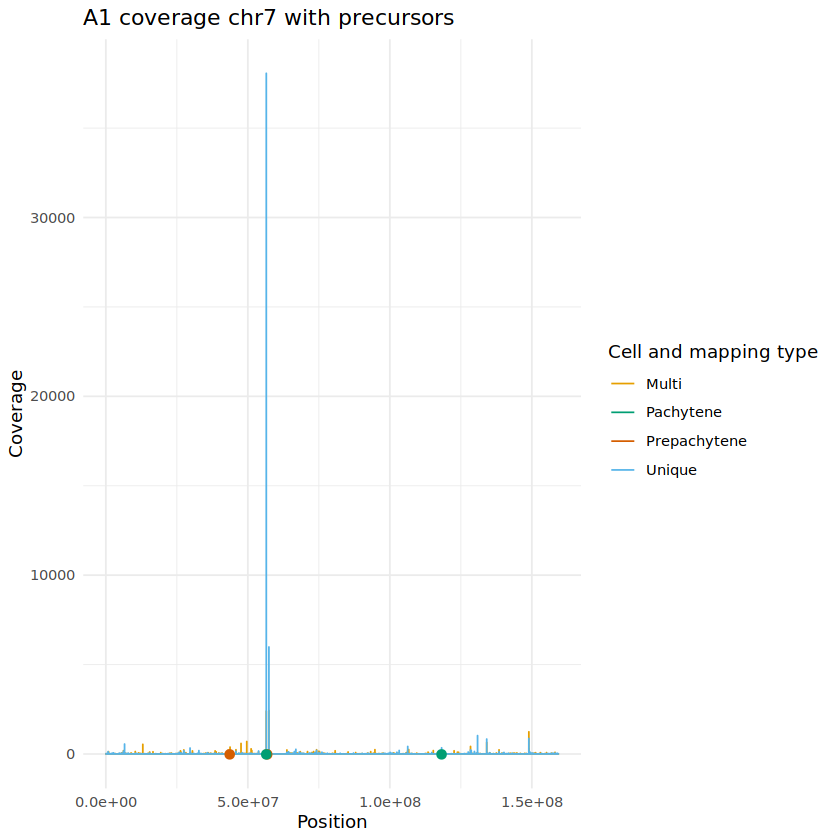

In [43]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-20, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr7 with precursors"))+
labs(x="Position", y="Coverage")

In [44]:
chrom1_both<- both %>% filter(CHROM == "8")
chrom1_pre<- data_precursors %>% filter(V1 == "chr8")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [45]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr8,124942054,124979312,Pachytene,8-q24-335,37258,NA,NA,NA,NA
1,chr8,124892560,124941921,Pachytene,8-q24-4652,49361,NA,NA,NA,NA
1,chr8,406954,477967,Prepachytene,pi-FBXO25,71013,NA,NA,NA,NA
1,chr8,28890394,29065504,Prepachytene,pi-HMBOX1,175110,NA,NA,NA,NA
1,chr8,142657459,142669994,Prepachytene,pi-JRK,12535,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,88307,1,8,Unique


In [46]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”Warning message:
“Removed 8236158 rows containing missing values (`geom_point()`).”

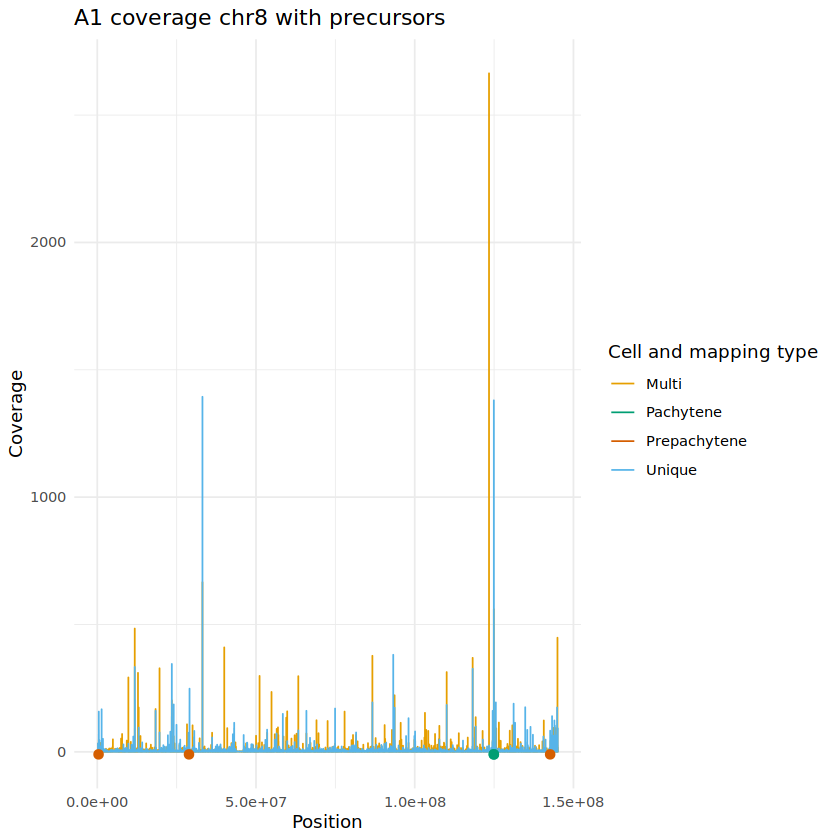

In [47]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-10, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr8 with precursors"))+
labs(x="Position", y="Coverage")

In [48]:
chrom1_both<- both %>% filter(CHROM == "9")
chrom1_pre<- data_precursors %>% filter(V1 == "chr9")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [49]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr9,26602085,26644595,Pachytene,9-p21-2544,42510,NA,NA,NA,NA
1,chr9,81906832,81977089,Prepachytene,9-q21-1333,70257,NA,NA,NA,NA
1,chr9,79887964,79915792,Pachytene,9-q21-769,27828,NA,NA,NA,NA
1,chr9,79862475,79887927,Pachytene,9-q21-8235,25452,NA,NA,NA,NA
1,chr9,90583871,90585623,Pachytene,9-q22-2190,1752,NA,NA,NA,NA
1,chr9,90580352,90583786,Pachytene,9-q22-405,3434,NA,NA,NA,NA


In [50]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 20 rows containing missing values (`geom_line()`).”Warning message:
“Removed 8700988 rows containing missing values (`geom_point()`).”

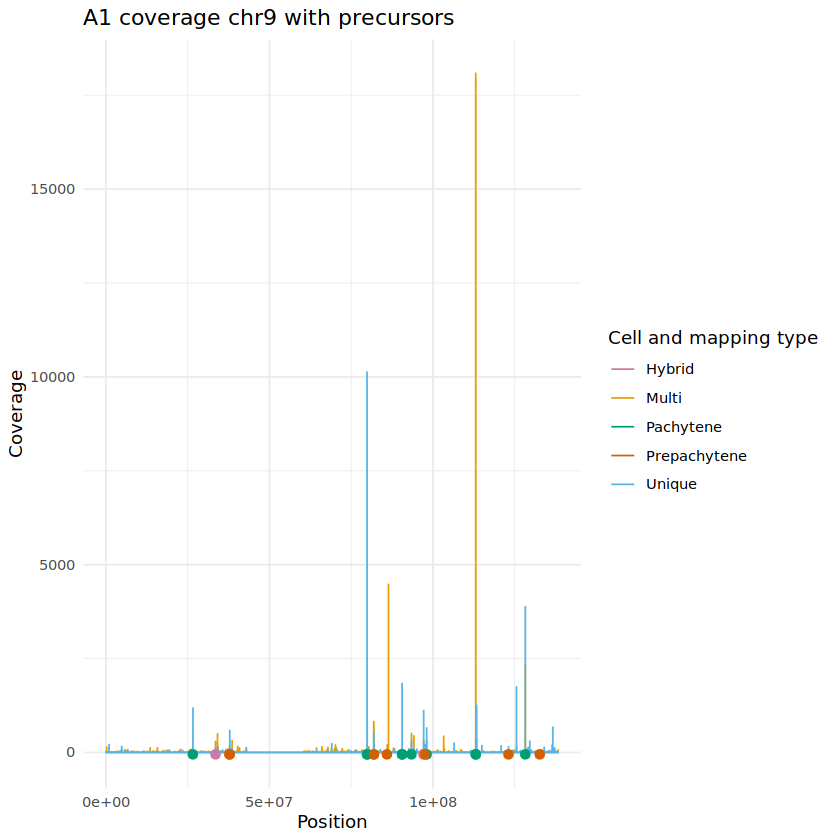

In [51]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-50, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr9 with precursors"))+
labs(x="Position", y="Coverage")

In [52]:
chrom1_both<- both %>% filter(CHROM == "10")
chrom1_pre<- data_precursors %>% filter(V1 == "chr10")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [53]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr10,28789400,28795995,Pachytene,10-p11-10777,6595,NA,NA,NA,NA
1,chr10,44997697,45000888,Pachytene,10-q11-242,3191,NA,NA,NA,NA
1,chr10,77763999,77783913,Pachytene,10-q22-16903,19914,NA,NA,NA,NA
1,chr10,83560992,83565126,Pachytene,10-q22-295,4134,NA,NA,NA,NA
1,chr10,87201504,87316625,Prepachytene,10-q23-1174,115121,NA,NA,NA,NA
1,chr10,89788743,89831978,Pachytene,10-q23-411,43235,NA,NA,NA,NA


In [54]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 9 rows containing missing values (`geom_line()`).”Warning message:
“Removed 8305124 rows containing missing values (`geom_point()`).”

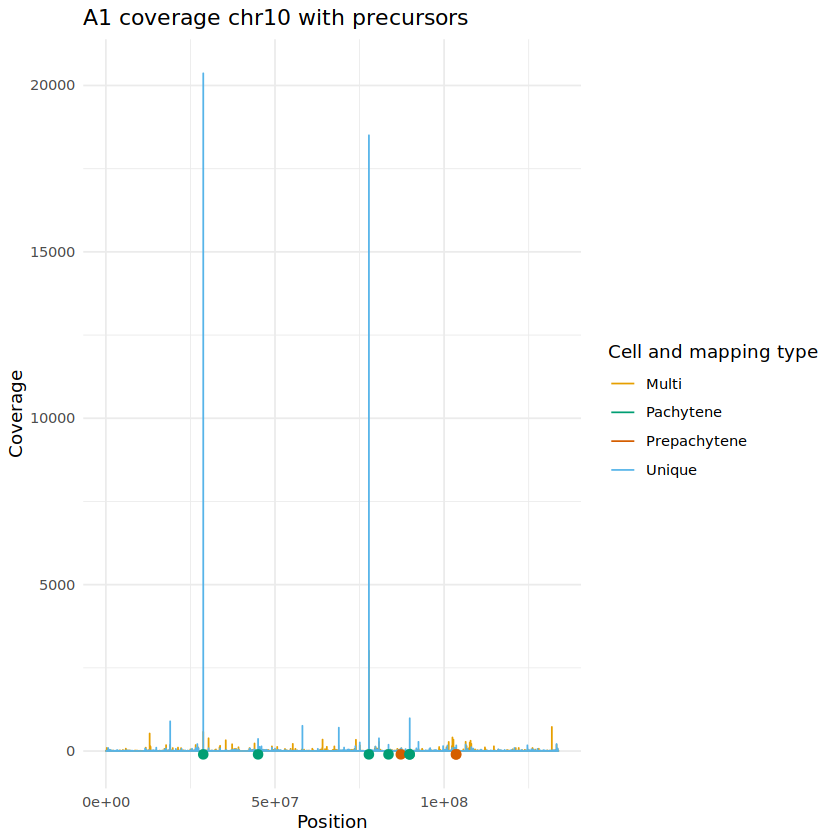

In [55]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-100, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr10 with precursors"))+
labs(x="Position", y="Coverage")

In [56]:
chrom1_both<- both %>% filter(CHROM == "11")
chrom1_pre<- data_precursors %>% filter(V1 == "chr11")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [57]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr11,45722307,45724555,Pachytene,11-p11-1759,2248,NA,NA,NA,NA
1,chr11,45672463,45722170,Pachytene,11-p11-43732,49707,NA,NA,NA,NA
1,chr11,119206275,119308149,Prepachytene,pi-CBL,101874,NA,NA,NA,NA
1,chr11,78215296,78417779,Prepachytene,pi-GAB2,202483,NA,NA,NA,NA
1,chr11,74988904,75010907,Pachytene,pi-NEU3,22003,NA,NA,NA,NA
1,chr11,74748869,74842413,Hybrid,pi-RNF169,93544,NA,NA,NA,NA


In [58]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 9 rows containing missing values (`geom_line()`).”Warning message:
“Removed 8615726 rows containing missing values (`geom_point()`).”

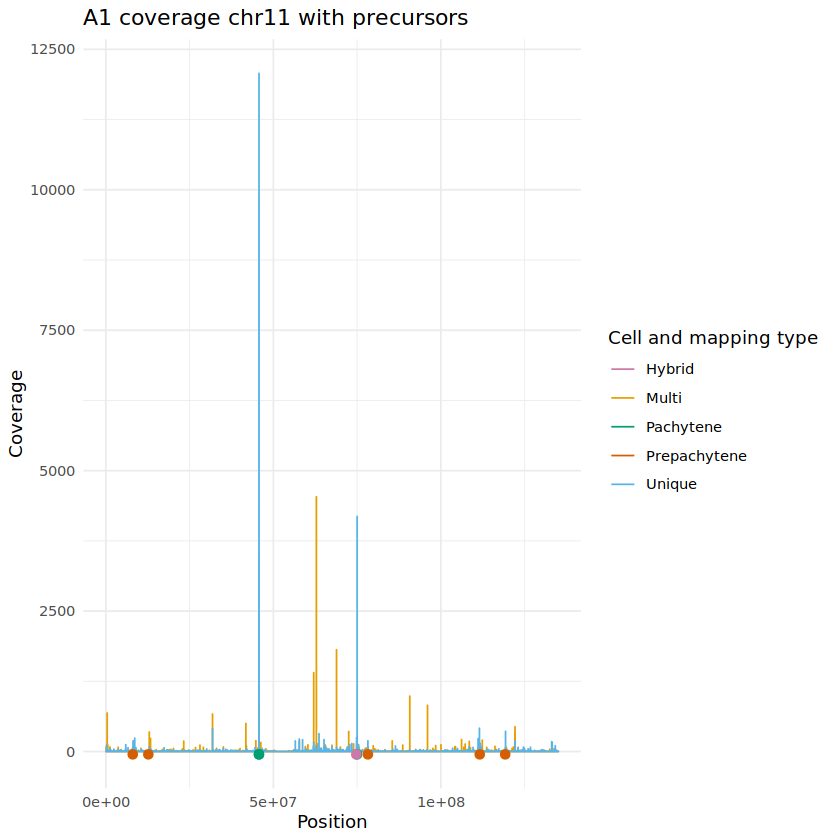

In [59]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-50, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr11 with precursors"))+
labs(x="Position", y="Coverage")

In [60]:
chrom1_both<- both %>% filter(CHROM == "12")
chrom1_pre<- data_precursors %>% filter(V1 == "chr12")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [61]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr12,9367463,9402156,Pachytene,12-p13-1820,34693,NA,NA,NA,NA
1,chr12,3461569,3491470,Pachytene,12-p13-6069,29901,NA,NA,NA,NA
1,chr12,9323181,9346990,Pachytene,12-p13-6740,23809,NA,NA,NA,NA
1,chr12,3437399,3461498,Pachytene,12-p13-836,24099,NA,NA,NA,NA
1,chr12,57931558,57936146,Pachytene,12-q13-1035,4588,NA,NA,NA,NA
1,chr12,100156411,100173343,Pachytene,12-q23-3486,16932,NA,NA,NA,NA


In [62]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 11 rows containing missing values (`geom_line()`).”Warning message:
“Removed 7918067 rows containing missing values (`geom_point()`).”

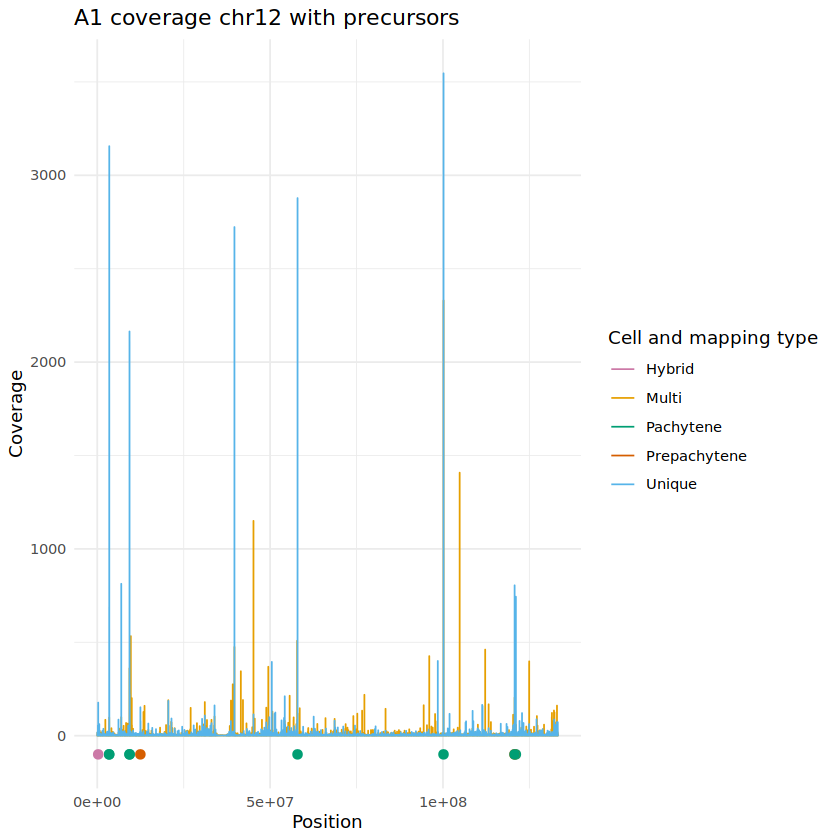

In [63]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-100, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr12 with precursors"))+
labs(x="Position", y="Coverage")

In [64]:
chrom1_both<- both %>% filter(CHROM == "13")
chrom1_pre<- data_precursors %>% filter(V1 == "chr13")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [65]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr13,31338833,31374861,Pachytene,13-q12-4738,36028,NA,NA,NA,NA
1,chr13,51584507,51766839,Prepachytene,pi-WDFY2,182332,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,18171491,1,13,Unique
2,NA,NA,NA,NA,NA,NA,18171492,1,13,Unique
2,NA,NA,NA,NA,NA,NA,18171493,1,13,Unique
2,NA,NA,NA,NA,NA,NA,18171494,1,13,Unique


In [66]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”Warning message:
“Removed 4289734 rows containing missing values (`geom_point()`).”

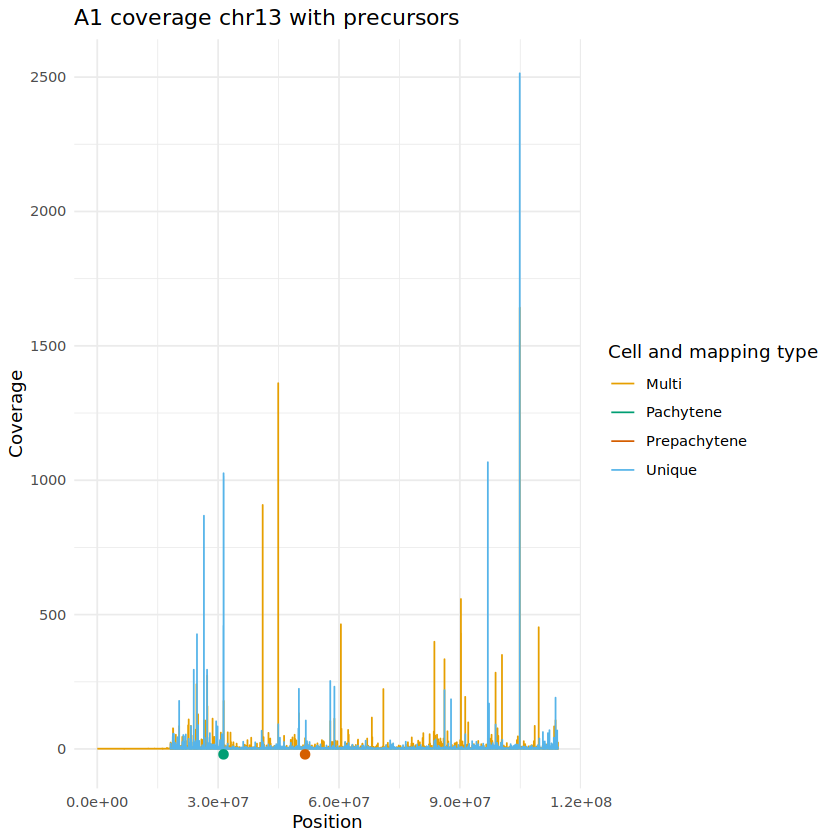

In [67]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-20, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr13 with precursors"))+
labs(x="Position", y="Coverage")

In [68]:
chrom1_both<- both %>% filter(CHROM == "14")
chrom1_pre<- data_precursors %>% filter(V1 == "chr14")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [69]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr14,88160639,88191407,Pachytene,14-q31-1379,30768,NA,NA,NA,NA
1,chr14,88132918,88160591,Pachytene,14-q31-15834,27673,NA,NA,NA,NA
1,chr14,55366391,55411858,Prepachytene,pi-ATG14,45467,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,16056072,1,14,Unique
2,NA,NA,NA,NA,NA,NA,16056073,1,14,Unique
2,NA,NA,NA,NA,NA,NA,16056074,1,14,Unique


In [70]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 3 rows containing missing values (`geom_line()`).”Warning message:
“Removed 5316842 rows containing missing values (`geom_point()`).”

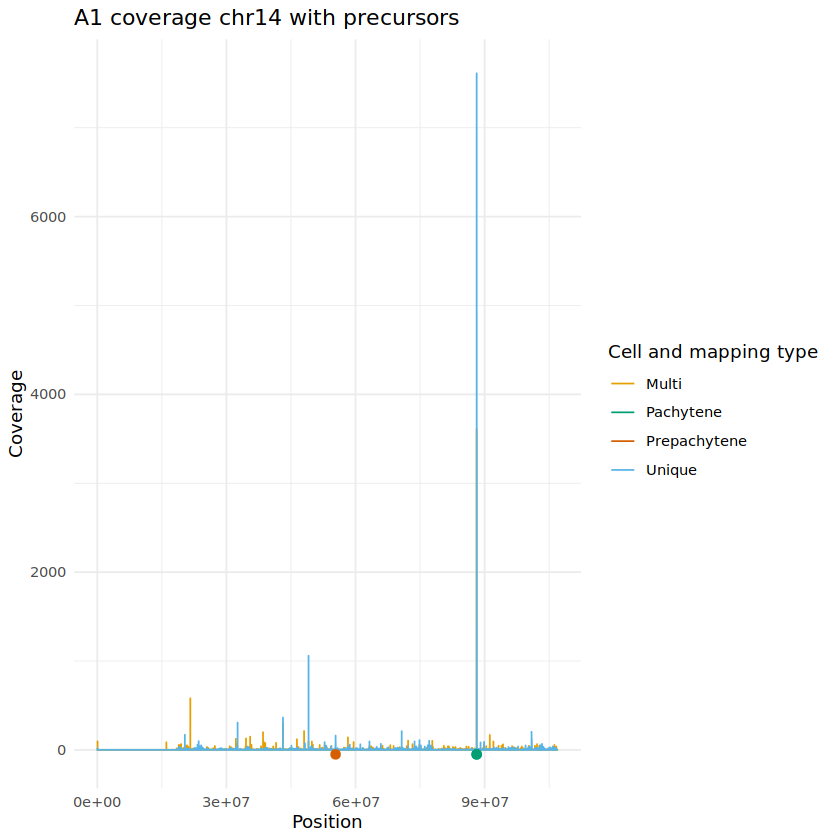

In [71]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-50, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr14 with precursors"))+
labs(x="Position", y="Coverage")

In [72]:
chrom1_both<- both %>% filter(CHROM == "15")
chrom1_pre<- data_precursors %>% filter(V1 == "chr15")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [73]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr15,62223875,62282161,Pachytene,15-q22-56093,58286,NA,NA,NA,NA
1,chr15,62196008,62224182,Pachytene,15-q22-8218,28174,NA,NA,NA,NA
1,chr15,85202204,85234785,Hybrid,15-q25-448,32581,NA,NA,NA,NA
1,chr15,99786705,99806909,Pachytene,15-q26-10235,20204,NA,NA,NA,NA
1,chr15,92580828,92620079,Pachytene,15-q26-10588,39251,NA,NA,NA,NA
1,chr15,92567817,92580775,Pachytene,15-q26-13520,12958,NA,NA,NA,NA


In [74]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 21 rows containing missing values (`geom_line()`).”Warning message:
“Removed 8257232 rows containing missing values (`geom_point()`).”

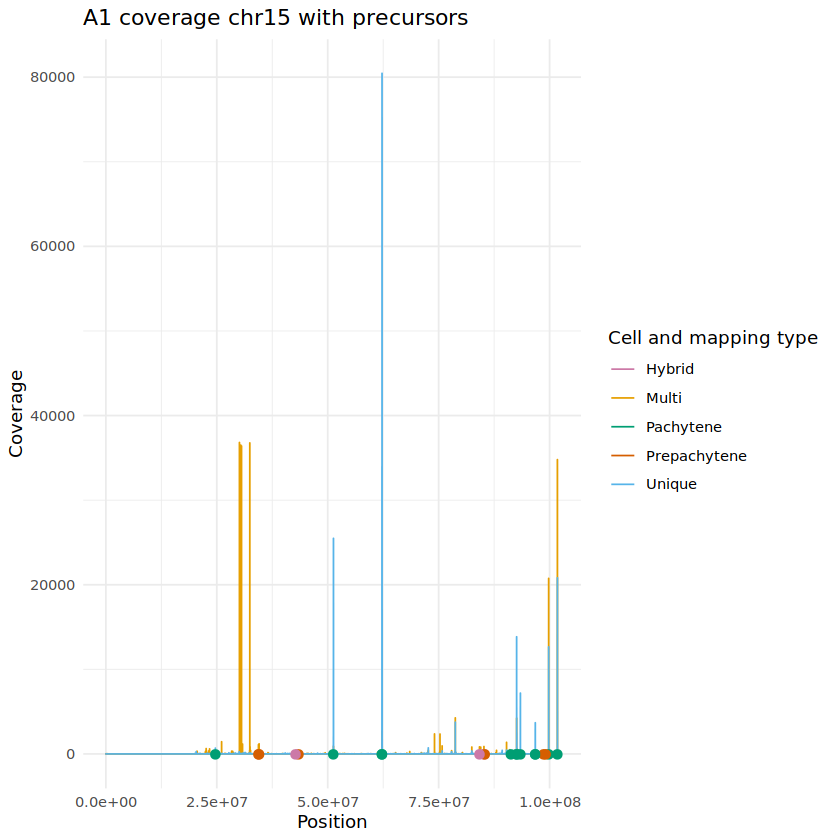

In [75]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-50, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr15 with precursors"))+
labs(x="Position", y="Coverage")

In [76]:
chrom1_both<- both %>% filter(CHROM == "16")
chrom1_pre<- data_precursors %>% filter(V1 == "chr16")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [77]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr16,25066936,25078809,Pachytene,16-p12-3782,11873,NA,NA,NA,NA
1,chr16,25067035,25078814,Pachytene,16-p12-3787,11779,NA,NA,NA,NA
1,chr16,72664803,72802308,Prepachytene,16-q22-2322,137505,NA,NA,NA,NA
1,chr16,69314014,69339506,Prepachytene,pi-COG8,25492,NA,NA,NA,NA
1,chr16,3611727,3665524,Prepachytene,pi-DNASE1,53797,NA,NA,NA,NA
1,chr16,48538725,48610209,Prepachytene,pi-N4BP1,71484,NA,NA,NA,NA


In [78]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 11 rows containing missing values (`geom_line()`).”Warning message:
“Removed 7740825 rows containing missing values (`geom_point()`).”

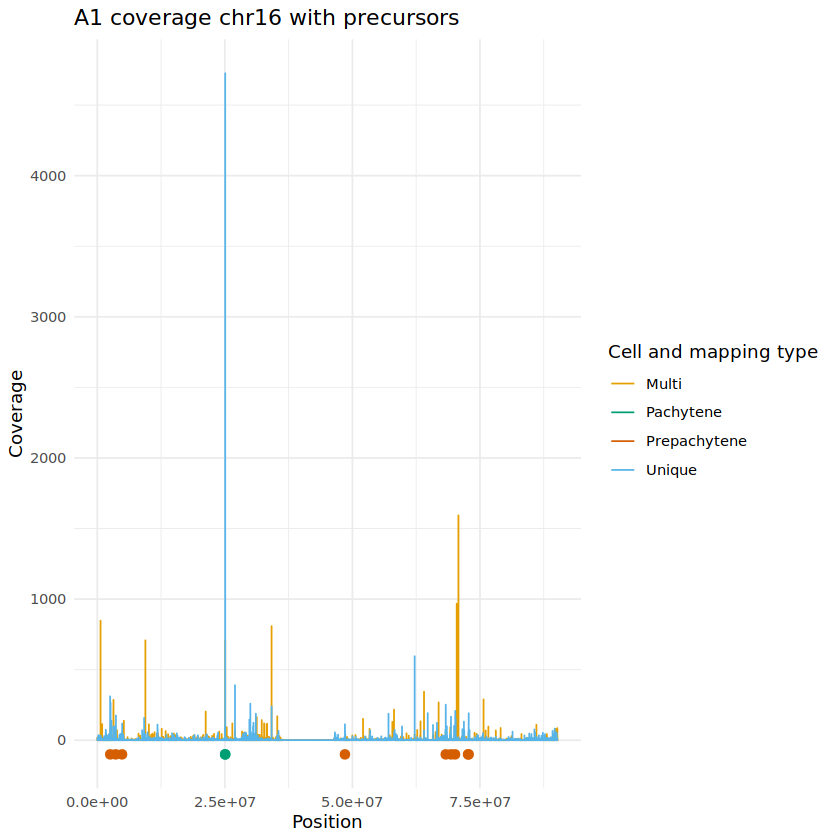

In [79]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-100, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr16 with precursors"))+
labs(x="Position", y="Coverage")

In [112]:
chrom1_both<- both %>% filter(CHROM == "17")
chrom1_pre<- data_precursors %>% filter(V1 == "chr17")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [113]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr17,18379854,18410824,Pachytene,17-p11-4161,30970,NA,NA,NA,NA
1,chr17,20533599,20566681,Pachytene,17-p11-4442,33082,NA,NA,NA,NA
1,chr17,28263633,28307382,Pachytene,17-q11-3352,43749,NA,NA,NA,NA
1,chr17,35904243,35918010,Pachytene,17-q12-687,13767,NA,NA,NA,NA
1,chr17,47017723,47067488,Prepachytene,17-q21-659,49765,NA,NA,NA,NA
1,chr17,68101554,68135929,Prepachytene,17-q24-747,34375,NA,NA,NA,NA


In [114]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”Warning message:
“Removed 6875586 rows containing missing values (`geom_point()`).”

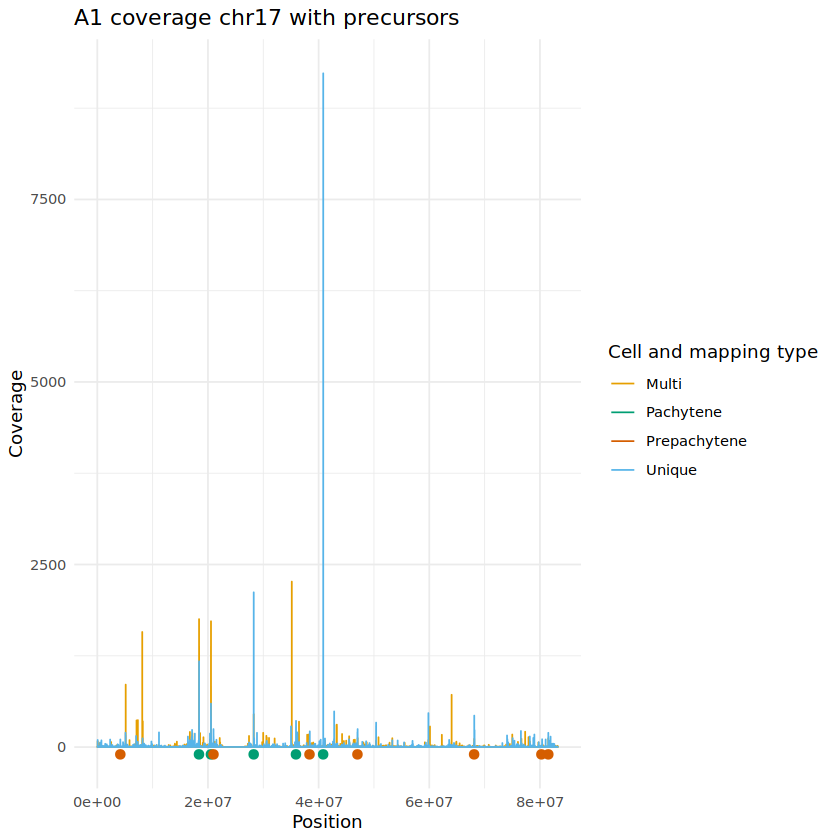

In [115]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-100, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr17 with precursors"))+
labs(x="Position", y="Coverage")

In [84]:
chrom1_both<- both %>% filter(CHROM == "18")
chrom1_pre<- data_precursors %>% filter(V1 == "chr18")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [85]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr18,11648847,11670163,Pachytene,18-p11-13059,21316,NA,NA,NA,NA
1,chr18,11670229,11688823,Pachytene,18-p11-2021,18594,NA,NA,NA,NA
1,chr18,6925476,6929869,Pachytene,18-p11-676,4393,NA,NA,NA,NA
1,chr18,2916993,3013186,Prepachytene,pi-LPIN2,96193,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,10828,1,18,Unique
2,NA,NA,NA,NA,NA,NA,10829,1,18,Unique


In [86]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”Warning message:
“Removed 3734189 rows containing missing values (`geom_point()`).”

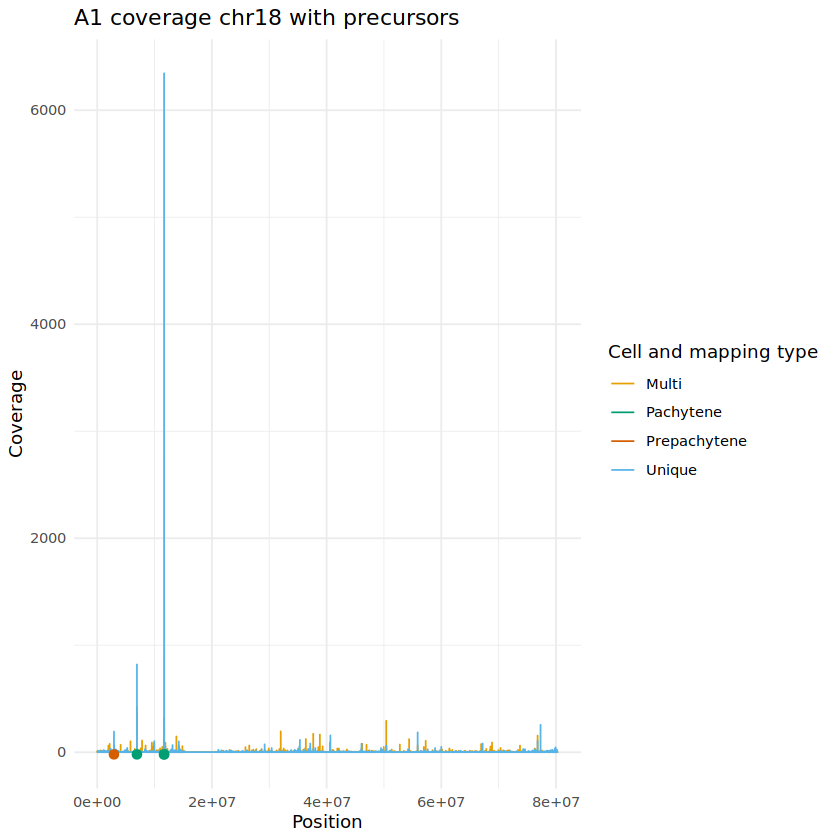

In [87]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-20, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr18 with precursors"))+
labs(x="Position", y="Coverage")

In [88]:
chrom1_both<- both %>% filter(CHROM == "19")
chrom1_pre<- data_precursors %>% filter(V1 == "chr19")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both)
                      
                      
                      == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [89]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr19,16033653,16041254,Pachytene,19-p13-25455,7601,NA,NA,NA,NA
1,chr19,16015633,16027460,Pachytene,19-p13-4412,11827,NA,NA,NA,NA
1,chr19,19741552,19754992,Pachytene,19-p13-6652,13440,NA,NA,NA,NA
1,chr19,34810543,34832869,Pachytene,19-q13-13274,22326,NA,NA,NA,NA
1,chr19,34833109,34855304,Pachytene,19-q13-2441,22195,NA,NA,NA,NA
1,chr19,34886469,34905171,Pachytene,19-q13-4180,18702,NA,NA,NA,NA


In [90]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 8 rows containing missing values (`geom_line()`).”Warning message:
“Removed 5791470 rows containing missing values (`geom_point()`).”

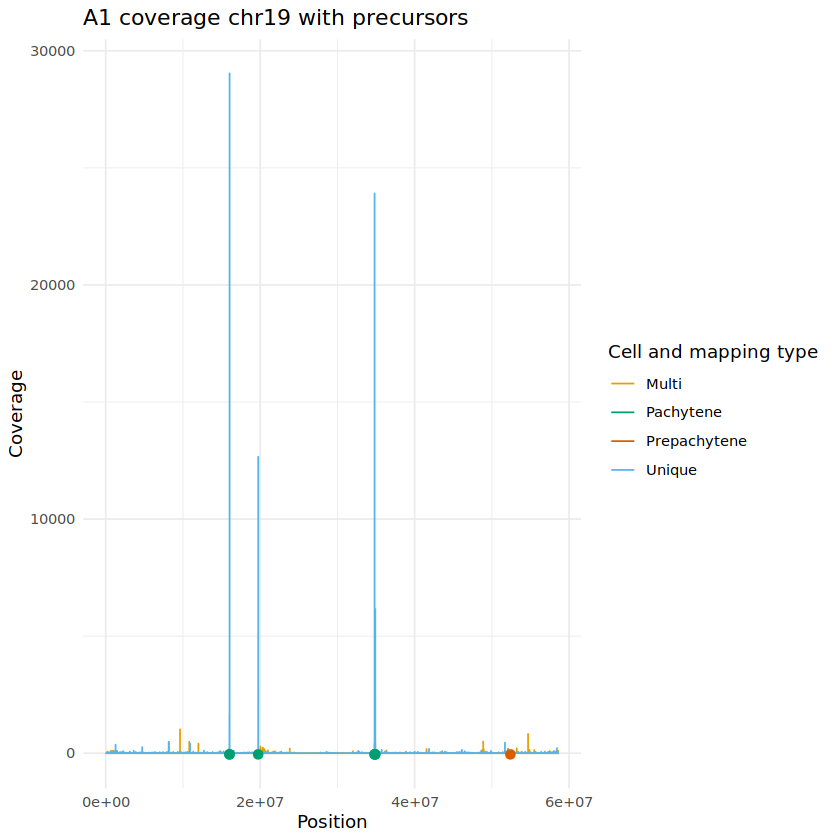

In [91]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-50, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr19 with precursors"))+
labs(x="Position", y="Coverage")

In [92]:
chrom1_both<- both %>% filter(CHROM == "20")
chrom1_pre<- data_precursors %>% filter(V1 == "chr20")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [93]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr20,5496066,5504613,Pachytene,20-p12-2902,8547,NA,NA,NA,NA
1,chr20,63895181,63936031,Prepachytene,pi-DNAJC5,40850,NA,NA,NA,NA
1,chr20,3927308,4015389,Prepachytene,pi-RNF24,88081,NA,NA,NA,NA
1,chr20,41178448,41317672,Prepachytene,pi-ZHX3,139224,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,73608,1,20,Unique
2,NA,NA,NA,NA,NA,NA,73609,1,20,Unique


In [94]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”Warning message:
“Removed 3859666 rows containing missing values (`geom_point()`).”

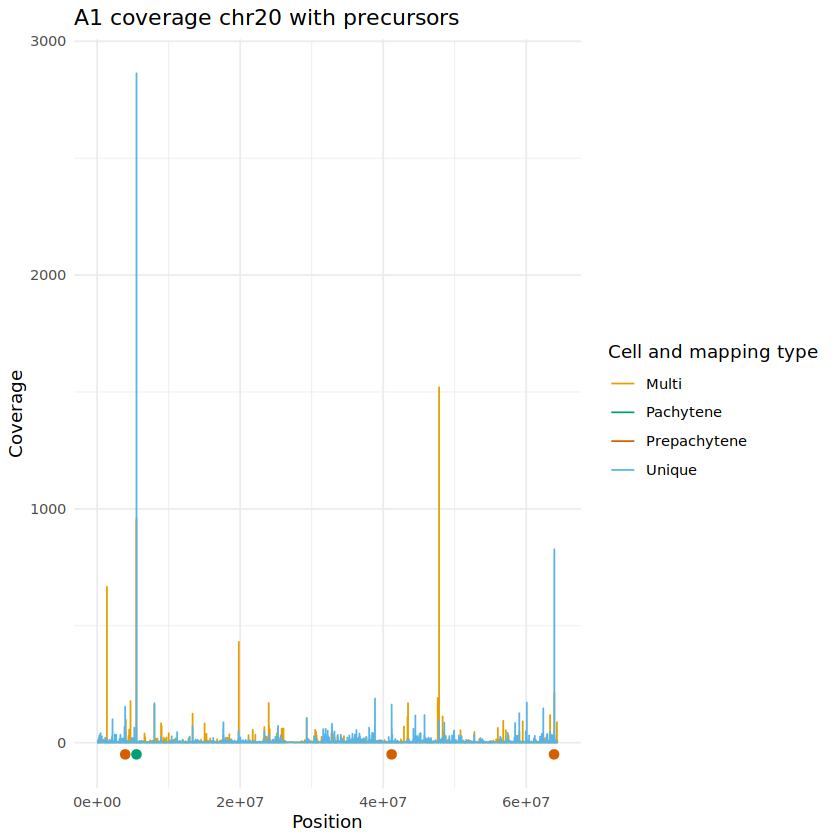

In [95]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-50, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr20 with precursors"))+
labs(x="Position", y="Coverage")

In [96]:
chrom1_both<- both %>% filter(CHROM == "21")
chrom1_pre<- data_precursors %>% filter(V1 == "chr21")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [97]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr21,44494339,44500566,Hybrid,21-q22-133,6227,NA,NA,NA,NA
1,chr21,44468861,44494212,Pachytene,21-q22-4766,25351,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,5065526,1,21,Unique
2,NA,NA,NA,NA,NA,NA,5065527,1,21,Unique
2,NA,NA,NA,NA,NA,NA,5065528,1,21,Unique
2,NA,NA,NA,NA,NA,NA,5065529,1,21,Unique


In [98]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”Warning message:
“Removed 2635093 rows containing missing values (`geom_point()`).”

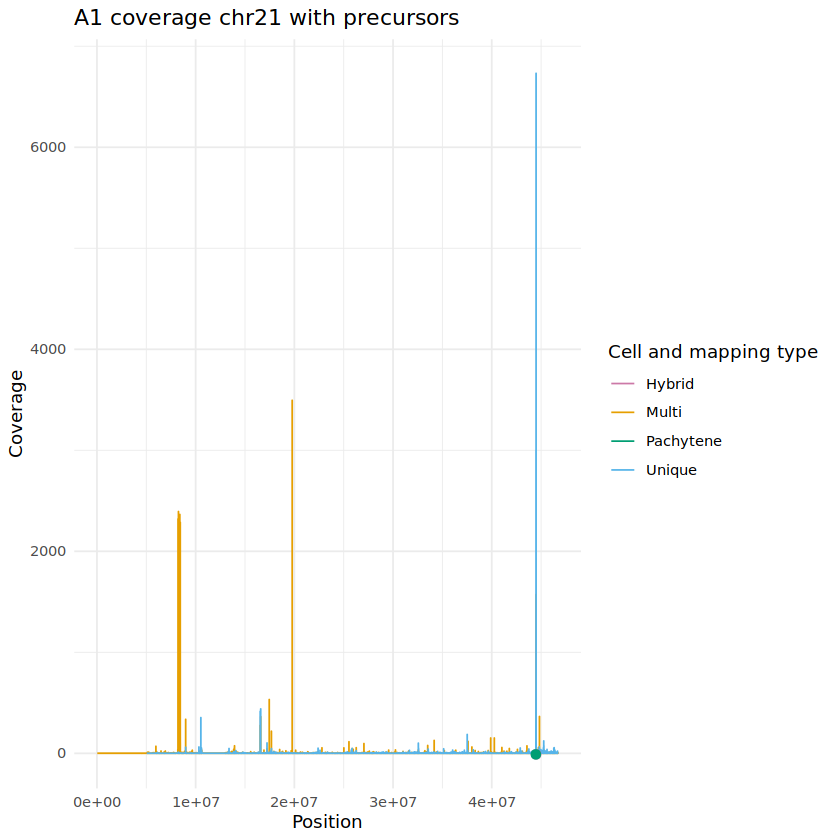

In [99]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-10, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr21 with precursors"))+
labs(x="Position", y="Coverage")

In [100]:
chrom1_both<- both %>% filter(CHROM == "22")
chrom1_pre<- data_precursors %>% filter(V1 == "chr22")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [101]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chr22,20689409,20704606,Hybrid,22-q11-182,15197,NA,NA,NA,NA
1,chr22,23891195,23914086,Pachytene,22-q11-5848,22891,NA,NA,NA,NA
1,chr22,41800678,41832208,Prepachytene,pi-CCDC134,31530,NA,NA,NA,NA
1,chr22,18998157,19020248,Pachytene,pi-DGCR9,22091,NA,NA,NA,NA
1,chr22,37352189,37371722,Pachytene,pi-ELFN2,19533,NA,NA,NA,NA
1,chr22,49854300,49890078,Prepachytene,pi-ZBED4,35778,NA,NA,NA,NA


In [102]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”Warning message:
“Removed 3966312 rows containing missing values (`geom_point()`).”

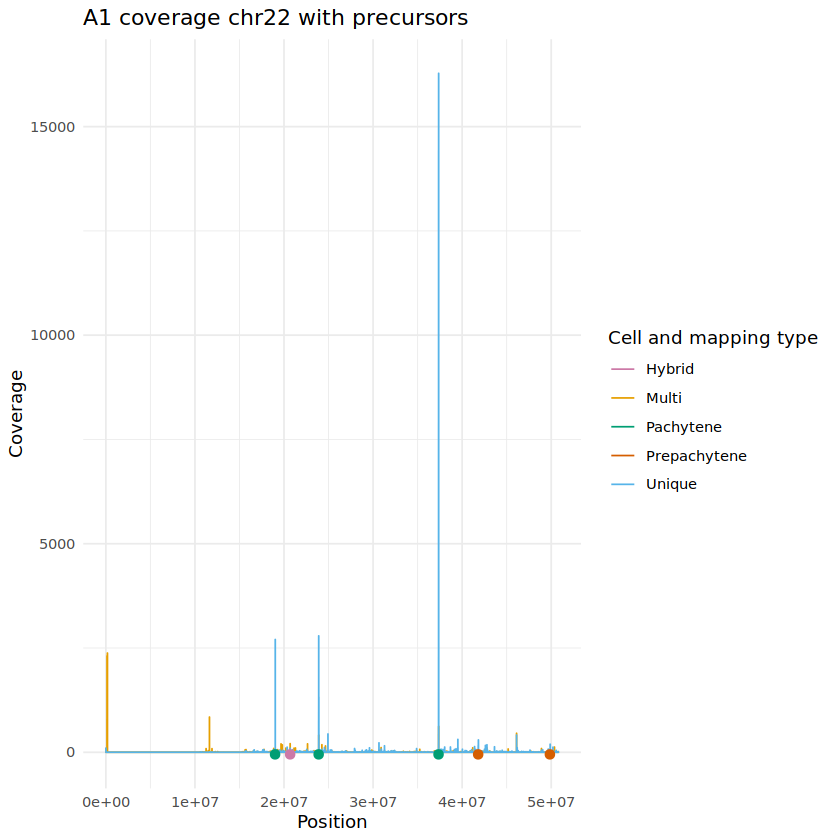

In [103]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-50, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chr22 with precursors"))+
labs(x="Position", y="Coverage")

In [104]:
chrom1_both<- both %>% filter(CHROM == "X")
chrom1_pre<- data_precursors %>% filter(V1 == "chrX")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [105]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
1,chrX,53094156,53170813,Prepachytene,pi-KANTR,76657,NA,NA,NA,NA
1,chrX,9403329,9443501,Prepachytene,X-p22-3627,40172,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,2782011,1,X,Unique
2,NA,NA,NA,NA,NA,NA,2782012,1,X,Unique
2,NA,NA,NA,NA,NA,NA,2782013,1,X,Unique
2,NA,NA,NA,NA,NA,NA,2782014,1,X,Unique


In [106]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”Warning message:
“Removed 6054653 rows containing missing values (`geom_point()`).”

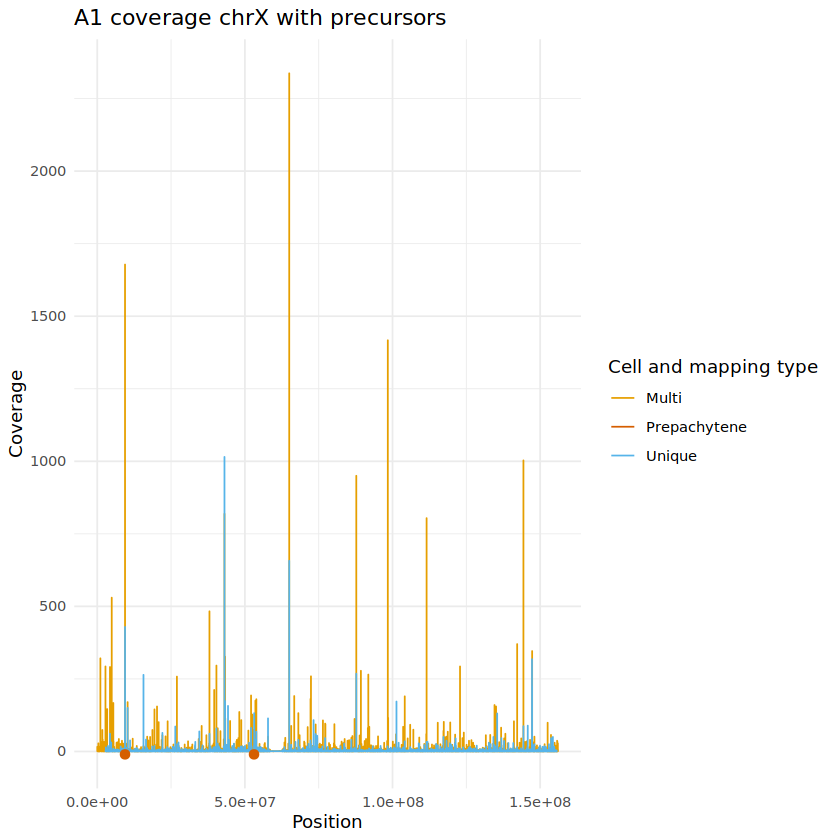

In [107]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-10, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chrX with precursors"))+
labs(x="Position", y="Coverage")

In [116]:
chrom1_both<- both %>% filter(CHROM == "Y")
chrom1_pre<- data_precursors %>% filter(V1 == "chrY")
chr1_data_both <- bind_rows(chrom1_pre,chrom1_both,.id = "df_id")
names(chr1_data_both)[names(chr1_data_both) == "V2"]<- "start"
names(chr1_data_both)[names(chr1_data_both) == "V3"]<- "end"

In [117]:
head(chr1_data_both)

df_id,V1,start,end,V4,V5,V6,position,coverage,CHROM,UNIQUE_MULTI
2,NA,NA,NA,NA,NA,NA,2787204,1,Y,Unique
2,NA,NA,NA,NA,NA,NA,2787205,1,Y,Unique
2,NA,NA,NA,NA,NA,NA,2787206,1,Y,Unique
2,NA,NA,NA,NA,NA,NA,2787207,1,Y,Unique
2,NA,NA,NA,NA,NA,NA,2787208,1,Y,Unique
2,NA,NA,NA,NA,NA,NA,2787209,1,Y,Unique


In [118]:
color<-c("Unique" = "#56B4E9", "Multi" = "#E69F00", "Pachytene"="#009E73", "Prepachytene"="#D55E00", "Hybrid"= "#CC79A7")

Warning message:
“Removed 1382464 rows containing missing values (`geom_point()`).”

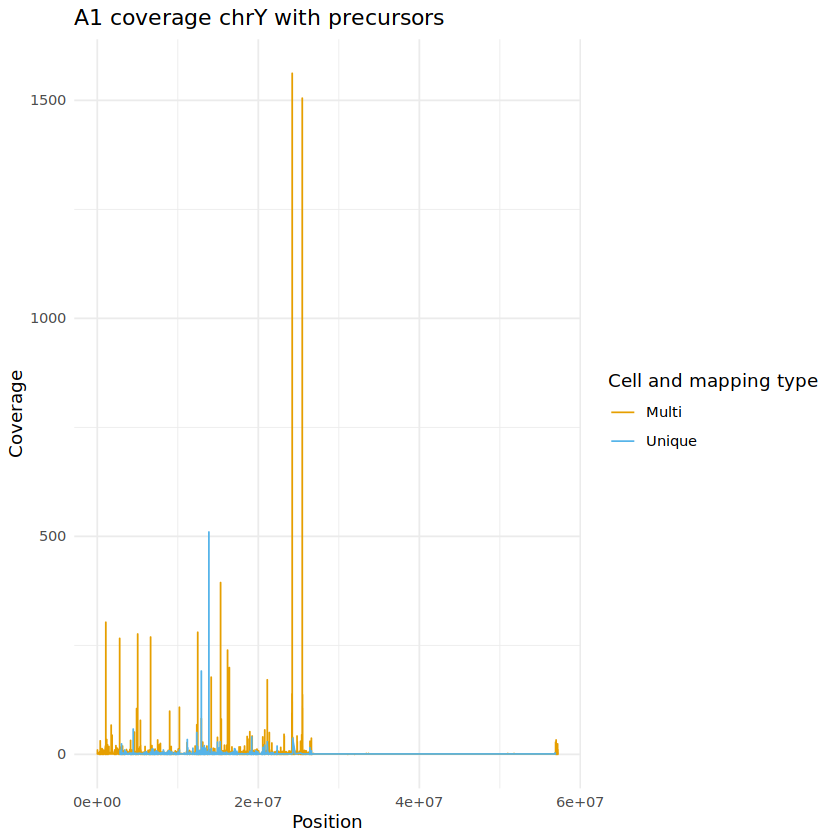

In [119]:
ggplot(chr1_data_both, aes(position, coverage,color= factor(UNIQUE_MULTI))) +
  geom_line() +
  geom_point(aes(x=as.numeric(start),y=-0, colour = factor(V4)),size=2.3,show.legend=FALSE)+
  theme_minimal()+
  scale_colour_manual(name="Cell and mapping type", values=color)+
  ggtitle(paste0(x," coverage chrY with precursors"))+
labs(x="Position", y="Coverage")